## stock _market_prediction


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('stock prices.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
stock_data = pd.read_csv("stock prices.csv")

In [3]:
stock_data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
stock_data.shape

(497472, 7)

In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [6]:
stock_data.isnull().sum()


symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [7]:
stock_data.skew()

C:\Users\BhavyaSri\AppData\Local\Temp\ipykernel_2220\3612229318.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stock_data.skew()


open       7.440827
high       7.429748
low        7.452458
close      7.441782
volume    10.322315
dtype: float64

In [8]:
stock_data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [9]:
DateSum = stock_data.groupby('date').sum() # Finding overall sum of each date.

# Checking which date has maximum volume.
DateSum['volume'][[DateSum['volume'].idxmax()]]

date
2015-08-24    4607945196
Name: volume, dtype: int64

In [10]:
HighestTraded = stock_data.loc[stock_data['date']=='2015-08-24']
HighestTraded

,symbol,date,open,high,low,close,volume
201208,AAL,2015-08-24,36.00,39.8999,34.10,37.62,19612661
201209,AAPL,2015-08-24,94.87,108.8000,92.00,103.12,162206292
201210,AAP,2015-08-24,173.26,178.6950,151.30,173.75,1464478
201211,ABBV,2015-08-24,61.17,64.8500,53.87,63.45,24292618
201212,ABC,2015-08-24,93.00,100.8500,91.48,98.53,4569825
...,...,...,...,...,...,...,...
201695,XYL,2015-08-24,30.49,31.9200,29.90,30.91,2479069
201696,YUM,2015-08-24,73.89,78.9900,71.39,77.19,10431594
201697,ZBH,2015-08-24,101.11,102.0000,94.73,99.57,2782148
201698,ZION,2015-08-24,26.73,27.8600,26.42,26.93,5879152


In [11]:
SymbolSum = HighestTraded.groupby('symbol').sum()
SymbolSum

,open,high,low,close,volume
symbol,,,,,
A,33.87,36.0100,33.57,34.68,4114990
AAL,36.00,39.8999,34.10,37.62,19612661
AAP,173.26,178.6950,151.30,173.75,1464478
AAPL,94.87,108.8000,92.00,103.12,162206292
ABBV,61.17,64.8500,53.87,63.45,24292618
...,...,...,...,...,...
XYL,30.49,31.9200,29.90,30.91,2479069
YUM,73.89,78.9900,71.39,77.19,10431594
ZBH,101.11,102.0000,94.73,99.57,2782148


In [12]:
SymbolSum.sort_values('volume',ascending=False).head()

,open,high,low,close,volume
symbol,,,,,
BAC,15.02,15.98,14.60,15.29,214649482
AAPL,94.87,108.80,92.00,103.12,162206292
GE,22.84,24.38,19.37,23.87,91236502
MSFT,40.45,43.31,39.72,41.68,88753660
FB,77.03,87.14,72.00,82.09,83710727


In [13]:
# First we have to convert date column to date-time    
stock_data['date'] = pd.to_datetime(stock_data['date'])

In [14]:
#Then we find day of the week for each date and add it to a column
stock_data['day'] = stock_data['date'].dt.dayofweek
stock_data.head()

,symbol,date,open,high,low,close,volume,day
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943,3
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,3
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711,3
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061,3
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391,3


In [15]:
# Group each day and find volume mean
DayMean = stock_data.groupby('day').mean() 
DayMean

,open,high,low,close,volume
day,,,,,
0,86.316806,87.082099,85.533313,86.322181,4.031172e+06
1,86.251125,87.022208,85.469677,86.271991,4.188689e+06
2,86.375931,87.173239,85.556928,86.415754,4.298572e+06
3,86.307541,87.113141,85.486302,86.324814,4.299304e+06
4,86.510280,87.270889,85.717814,86.509309,4.435782e+06


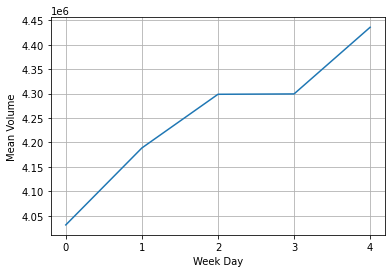

In [16]:
# Let's use a line chart to see which days have highest and lowest volumes.
x = range(0,5)
plt.plot(x,DayMean['volume'])
plt.ylabel('Mean Volume')
plt.xlabel('Week Day')
plt.xticks(x)
plt.grid()
plt.show()

In [17]:
AMZN_data = stock_data.loc[stock_data["symbol"]=="AMZN"]
AMZN_data

,symbol,date,open,high,low,close,volume,day
37,AMZN,2014-01-02,398.80,399.36,394.02,397.97,2140246,3
520,AMZN,2014-01-03,398.29,402.71,396.22,396.44,2213512,4
1003,AMZN,2014-01-06,395.85,397.00,388.42,393.63,3172207,0
1486,AMZN,2014-01-07,395.04,398.47,394.29,398.03,1916684,1
1969,AMZN,2014-01-08,398.47,403.00,396.04,401.92,2316903,2
...,...,...,...,...,...,...,...,...
494984,AMZN,2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,4
495489,AMZN,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,1
495994,AMZN,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,2
496499,AMZN,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,3


In [18]:
# For each date, we need to find volatility and find highest
AMZN_data['volatility'] = AMZN_data['high'] - AMZN_data['low']
AMZN_data.head()

C:\Users\BhavyaSri\AppData\Local\Temp\ipykernel_2220\3891740605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_data['volatility'] = AMZN_data['high'] - AMZN_data['low']


,symbol,date,open,high,low,close,volume,day,volatility
37,AMZN,2014-01-02,398.80,399.36,394.02,397.97,2140246,3,5.34
520,AMZN,2014-01-03,398.29,402.71,396.22,396.44,2213512,4,6.49
1003,AMZN,2014-01-06,395.85,397.00,388.42,393.63,3172207,0,8.58
1486,AMZN,2014-01-07,395.04,398.47,394.29,398.03,1916684,1,4.18
1969,AMZN,2014-01-08,398.47,403.00,396.04,401.92,2316903,2,6.96


In [19]:
AMZN_data.sort_values("volatility",ascending=False)

,symbol,date,open,high,low,close,volume,day,volatility
426023,AMZN,2017-06-09,1012.50,1012.99,927.00,978.31,7647692,4,85.99
354027,AMZN,2016-11-10,778.81,778.83,717.70,742.38,12746994,3,61.13
475315,AMZN,2017-10-27,1058.14,1105.58,1050.55,1100.95,16565021,4,55.03
190913,AMZN,2015-07-24,578.99,580.57,529.35,529.42,21909381,4,51.22
486403,AMZN,2017-11-29,1194.80,1194.80,1145.19,1161.27,9257512,2,49.61
...,...,...,...,...,...,...,...,...,...
149299,AMZN,2015-03-24,373.99,375.24,372.27,374.09,2228214,1,2.97
121946,AMZN,2014-12-31,311.55,312.98,310.01,310.35,2057766,2,2.97
110722,AMZN,2014-11-26,333.78,334.65,331.75,333.57,1985949,2,2.90
50346,AMZN,2014-06-03,305.75,307.92,305.07,307.19,2379273,1,2.85


In [20]:
beginDate = stock_data.loc[stock_data['date']=='2014-01-02'] # filtering by date
last = beginDate.sort_values('close').head(50)

In [21]:
EndDate = stock_data.loc[stock_data['date']=='2017-12-29'] # filtering by date
top = EndDate.sort_values('close',ascending=False).head(50)

In [22]:
list(set(top['symbol']).intersection(set(last['symbol'])))

['NVDA']

In [23]:
top.loc[top['symbol']=='NVDA']

,symbol,date,open,high,low,close,volume,day
497313,NVDA,2017-12-29,198.46,198.46,193.5,193.5,6999116,4


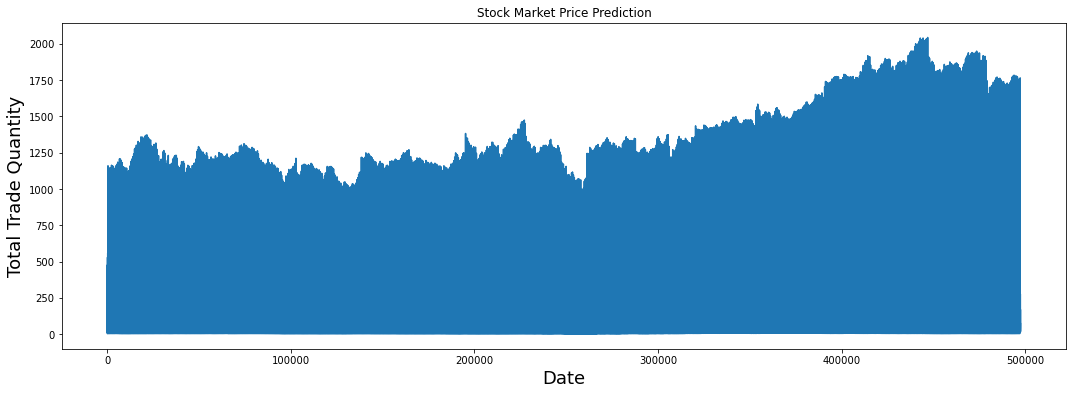

In [24]:
plt.figure(figsize=(18,6))

plt.title("Stock Market Price Prediction")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.plot(stock_data['open'])
plt.show()


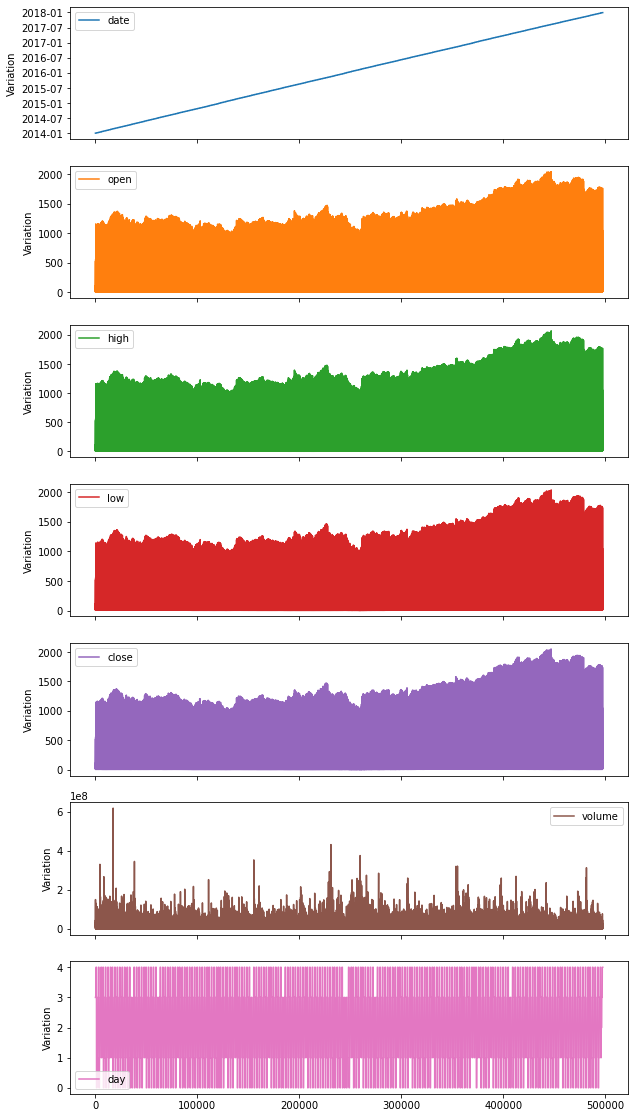

In [25]:
cols_plot = ['date','Open','High','Low','Close','volume']
axes = stock_data.plot(alpha = 1, figsize=(10, 20), subplots = True)
for i in axes:
    i.set_ylabel('Variation')

In [26]:
# Percentage Gain
((193.5-15.86)/15.86)*100

1120.0504413619167